# 3er intento de Examen 1 curso Fundamentos de Data Science : Telco Customer Churn 

## **Requisitos:**

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

**El dataset puede ser encontrado aquí:**

* Limpieza de datos con Python:
* Identificar y solucionar cualquier valor duplicado.
* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
* Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

**Exploración de datos con Python:**

* Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

## **Configuración**

In [1]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
from IPython.display import HTML, Image
import utils
from collections import Counter
from scipy.stats import chi2_contingency

path = '../data/kaggle/telco-customer-churn/telco-customer-churn.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
print(df.shape)
df.info()

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

## Limpieza de datos con Python:

### **Verificación y ajuste de tipos de datos** 

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [2]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [3]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [4]:
data_dict = {
    'customerID': 'object',
    'gender': 'category',
    'SeniorCitizen': 'bool',
    'Partner': 'bool',
    'Dependents': 'bool',
    'tenure': 'int64',
    'PhoneService': 'bool',
    'MultipleLines': 'category',
    'InternetService': 'category',
    'OnlineSecurity': 'category',
    'OnlineBackup': 'category',
    'DeviceProtection': 'category',
    'TechSupport': 'category',
    'StreamingTV': 'category',
    'StreamingMovies': 'category',
    'Contract': 'category',
    'PaperlessBilling': 'bool',
    'PaymentMethod': 'category',
    'MonthlyCharges': 'float64',
    'TotalCharges': 'float64',
    'Churn': 'bool'
}

# Convertir tipos de datos según el diccionario
for column, dtype in data_dict.items():
    df[column] = df[column].astype(dtype, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   bool    
 4   Dependents        7043 non-null   bool    
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   bool    
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [5]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
# Reemplazar espacios vacíos en 'TotalCharges' con NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
# Convertir la columna a float64
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   bool    
 4   Dependents        7043 non-null   bool    
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   bool    
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### **Detección y eliminación de valores duplicados** 

Asegúrate de que cada registro en el dataset sea único

In [7]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### **Consistencia en valores categóricos**

Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’)

In [8]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

,0,1,2,3
gender,Female,Male,None,None
SeniorCitizen,False,True,None,None
Partner,True,False,None,None
Dependents,False,True,None,None
PhoneService,False,True,None,None
MultipleLines,No phone service,No,Yes,None
InternetService,DSL,Fiber optic,No,None
OnlineSecurity,No,Yes,No internet service,None
OnlineBackup,Yes,No,No internet service,None
DeviceProtection,No,Yes,No internet service,None


### **Manejo de valores faltantes:**

Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato

In [9]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
TotalCharges,7032,11,0.16
customerID,7043,0,0.00
DeviceProtection,7043,0,0.00
MonthlyCharges,7043,0,0.00
PaymentMethod,7043,0,0.00
PaperlessBilling,7043,0,0.00
Contract,7043,0,0.00
StreamingMovies,7043,0,0.00
StreamingTV,7043,0,0.00
TechSupport,7043,0,0.00


In [10]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [11]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[df.TotalCharges.isna()].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
customerID,4472-LVYGI,3115-CZMZD,5709-LVOEQ,4367-NUYAO,1371-DWPAZ,7644-OMVMY,3213-VVOLG,2520-SGTTA,2923-ARZLG,4075-WKNIU,2775-SEFEE
gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
SeniorCitizen,False,False,False,False,False,False,False,False,False,False,False
Partner,True,False,True,True,True,True,True,True,True,True,False
Dependents,True,True,True,True,True,True,True,True,True,True,True
tenure,0,0,0,0,0,0,0,0,0,0,0
PhoneService,False,True,True,True,False,True,True,True,True,True,True
MultipleLines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
InternetService,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
OnlineSecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes


In [12]:
df.fillna(value={'TotalCharges': 0}, inplace=True)

### **Detección de datos anómalos:**

Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [13]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
tenure,0.0,0.0,0.00,72.00
MonthlyCharges,0.0,0.0,18.25,118.75
TotalCharges,0.0,0.0,0.00,8684.80


In [14]:
df[numerical_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## **Exploración de datos con Python**

### **Visualizaciones exploratorias univariadas**

Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código

#### Histograma de variables numéricas

#### Visualización 1

**Hipótesis extraída**

* La mayoría de las personas son clientes relativamente nuevos y se les cobra un fee mensual bajo

**Análisis descriptivo que la justifica**

* Como podemos ver en los histogramas, la distribución del tiempo en meses que el cliente lleva con la compañia tiene sus peak en clientes con menos de 6 meses y también en clientes que llevan mucho tiempo (más de 70). Esto sugiere que podemos crear categorías intesantes si agrupamos varios meses que hagan sentido de negocio. En este caso en particular podríamos usar los quartiles o alguna generación arbitraria con criteruos de negocio como esta:
    * Recién adquiridos: 0 meses
    * Nuevos: 1 a 6 meses
    * Relativamente nuevos: 7 a 12 meses
    * Antiguo: 13 meses a 24 meses
    * 25 meses o más: consolidado   

* Los cargos mensuales muestran una distribución peaks en valores menores a los 25 USD, luego se aplana pero vuelve a incrementar levemente su frecuencia sobre los 40 USD. Esto sugiere que podríamos agrupar creando al menos 3 categorías distintas o bien usar los quartiles.

* Los cargos totales realizados a cada cliente muestran una clara distribucón con sesgo a los valores bajos, lo que va en linea con que la mayoría de las personas son clientes relativamente nuevos y se les cobra un fee mensual bajo

* PD: los rangos finales en caso de crear agrupaciones de valores también podemos definirlos en función de alguna variable de interés de la cual queramos estudiar el efecto.

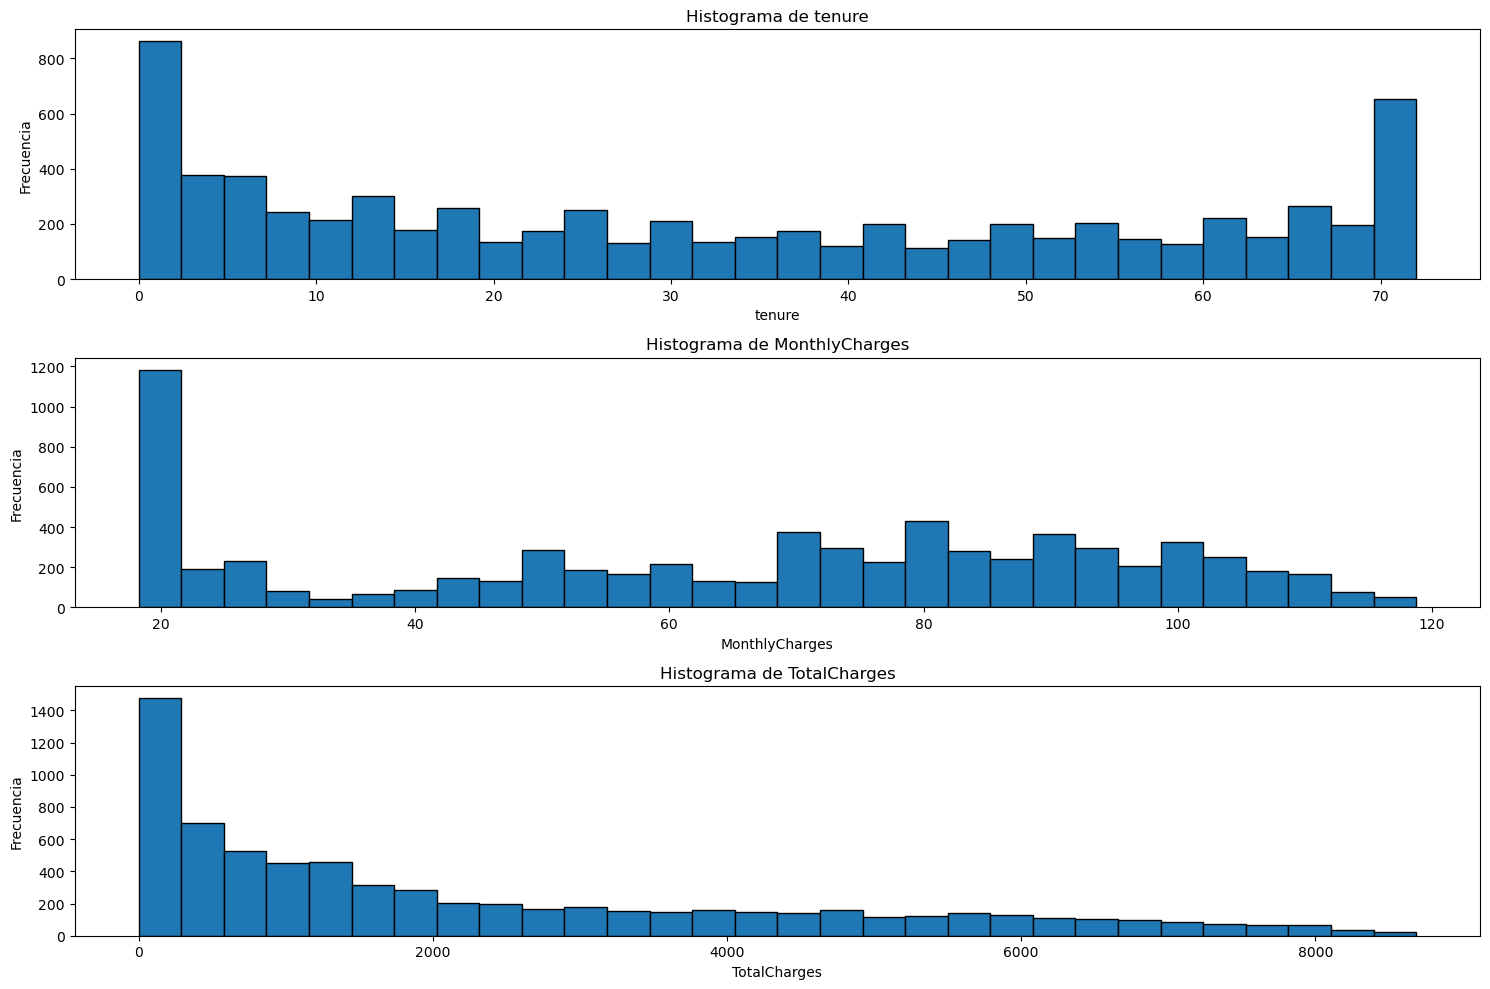

In [15]:
# Configuración del tamaño de la gráfica
plt.figure(figsize=(15, 10))

# Crear un histograma para cada columna numérica
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.hist(df[column].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### Visualización 2

**Hipótesis planteada**

* Hay una oportunidad para generar contratos que pasen del cargo mes a mes a periodos de uno o dos años, con el objetivo de aumentar la predictibilidad de los ingresos

* Es posible llegar a más ciudadanos de edad avanzada "senior citizens"

* Hay espacio para generar cross-selling vendiendo más productos de seguridad online, protección de dispositivos y soporte técnico en IT

**Análisis descriptivo que lo sustenta**

* Menor cantidad de contratos por año o dos años que mes a mes
* Significativamente menos clientes que son ciudadanos senior
* Baja penetración en la venta de productos de seguridad online, protección de dispositivos y soporte técnico en IT

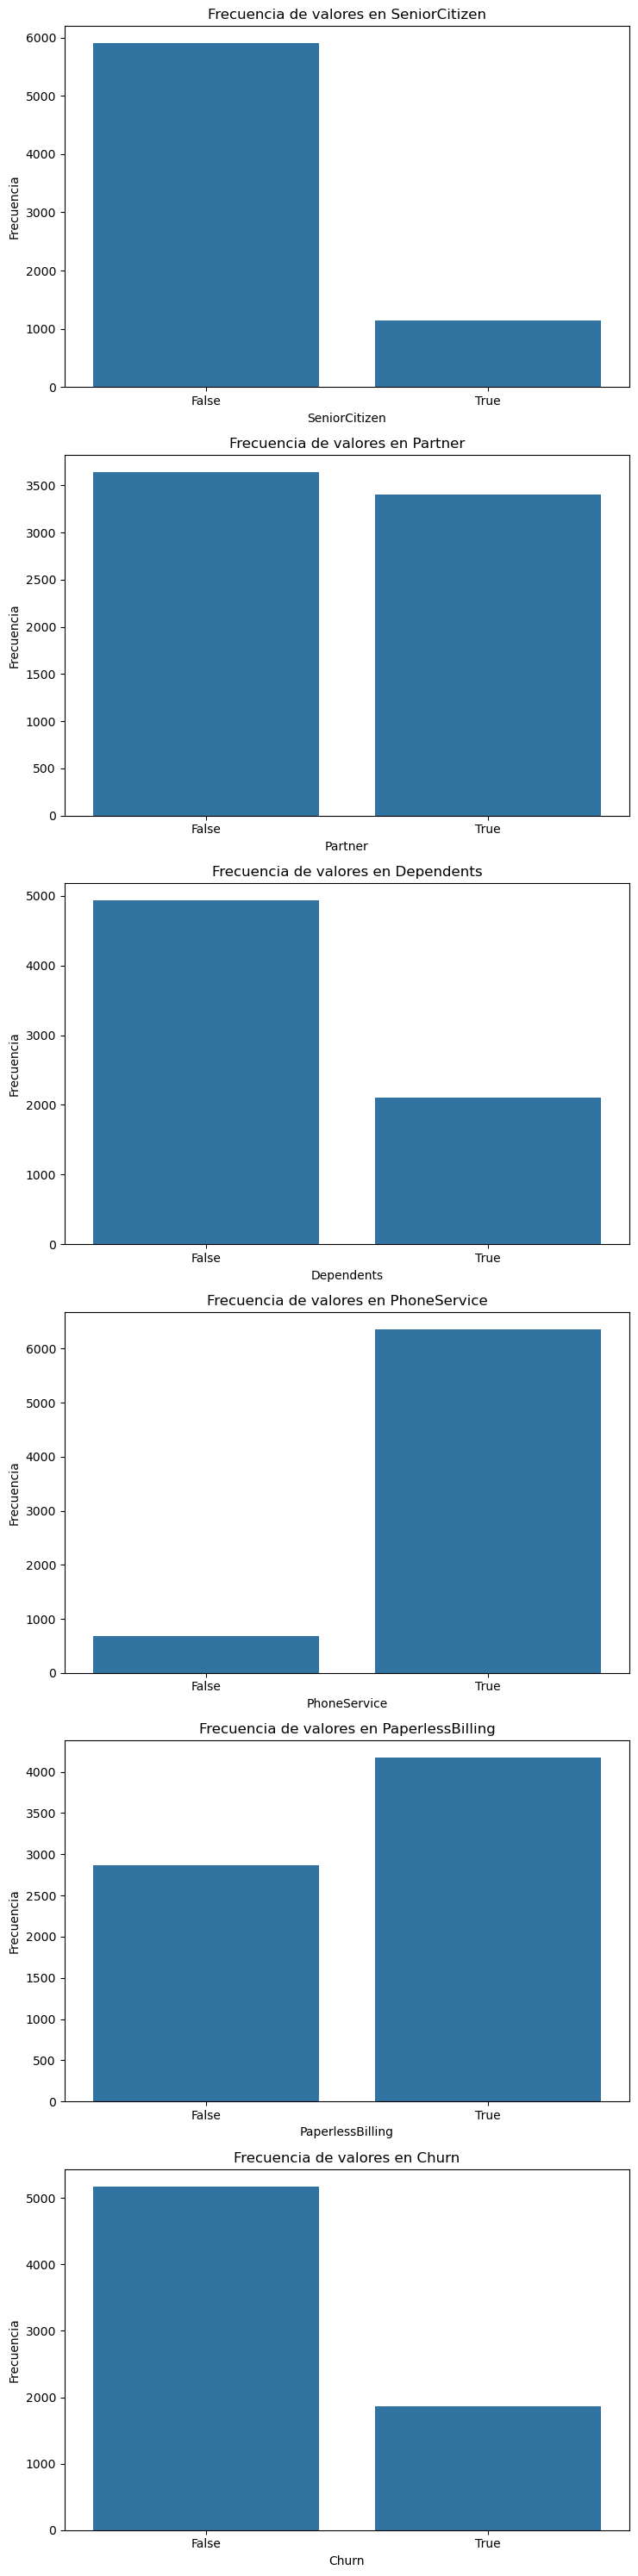

In [16]:
# Identificar columnas booleanas
boolean_columns = df.select_dtypes(include=bool).columns
# Configuración del tamaño de la gráfica
plt.figure(figsize=(7.5, 5 * len(boolean_columns)))
# Crear un gráfico de conteo para cada columna booleana
for i, column in enumerate(boolean_columns, 1):
    plt.subplot(len(boolean_columns), 1, i)
    sns.countplot(x=df[column])
    plt.title(f'Frecuencia de valores en {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

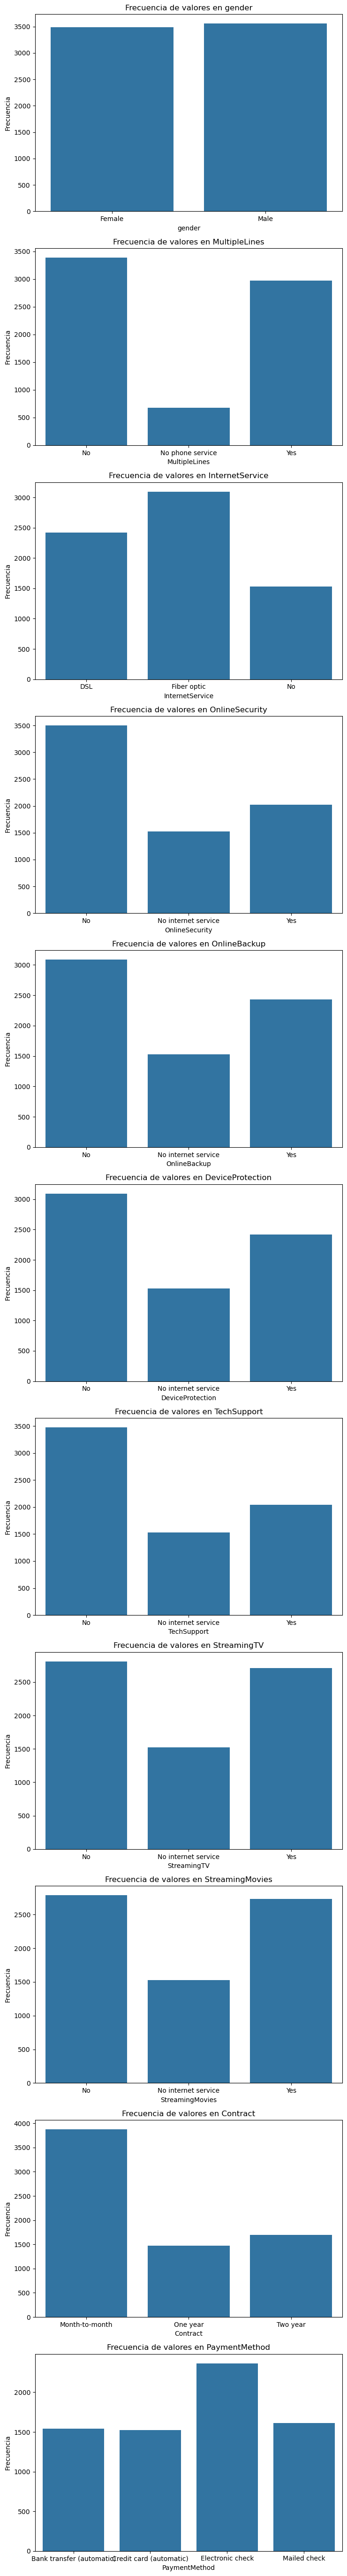

In [17]:
# Identificar columnas booleanas
boolean_columns = df.select_dtypes(include='category').columns
# Configuración del tamaño de la gráfica
plt.figure(figsize=(7.5, 5 * len(boolean_columns)))
# Crear un gráfico de conteo para cada columna booleana
for i, column in enumerate(boolean_columns, 1):
    plt.subplot(len(boolean_columns), 1, i)
    sns.countplot(x=df[column])
    plt.title(f'Frecuencia de valores en {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### **Visualizaciones exploratorias multivariadas**

Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código

#### Visualización 1: Variables numéricas con respecto a la fuga de clientes

**Hipótesis planteadas**

* Mientras más antiguo el cliente, menor es la probabilidad de fuga
* Cargos mensuales bajos promueven que los clientes se queden

**Análisis descriptivo que lo sustenta**

* Es posible ver un posible punto de inflexión en el cual después de cierta cantidad de tiempo como cliente ya es muy difícil que se fugue
* Vemos que para cargos mensuales altos tenemos clientes fugados y no fugados, pero podemos observar que en los cargos mensuales bajos es donde más concentración de clientes no fugados tenemos

Churn                       False        True 
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5174.000000  1869.000000
               mean     61.265124    74.441332
               std      31.092648    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.425000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5174.000000  1869.000000
               mean   2549.911442  1531.796094
               std    2329.954215  1890.822994
               min       0.000000    18.850000
             

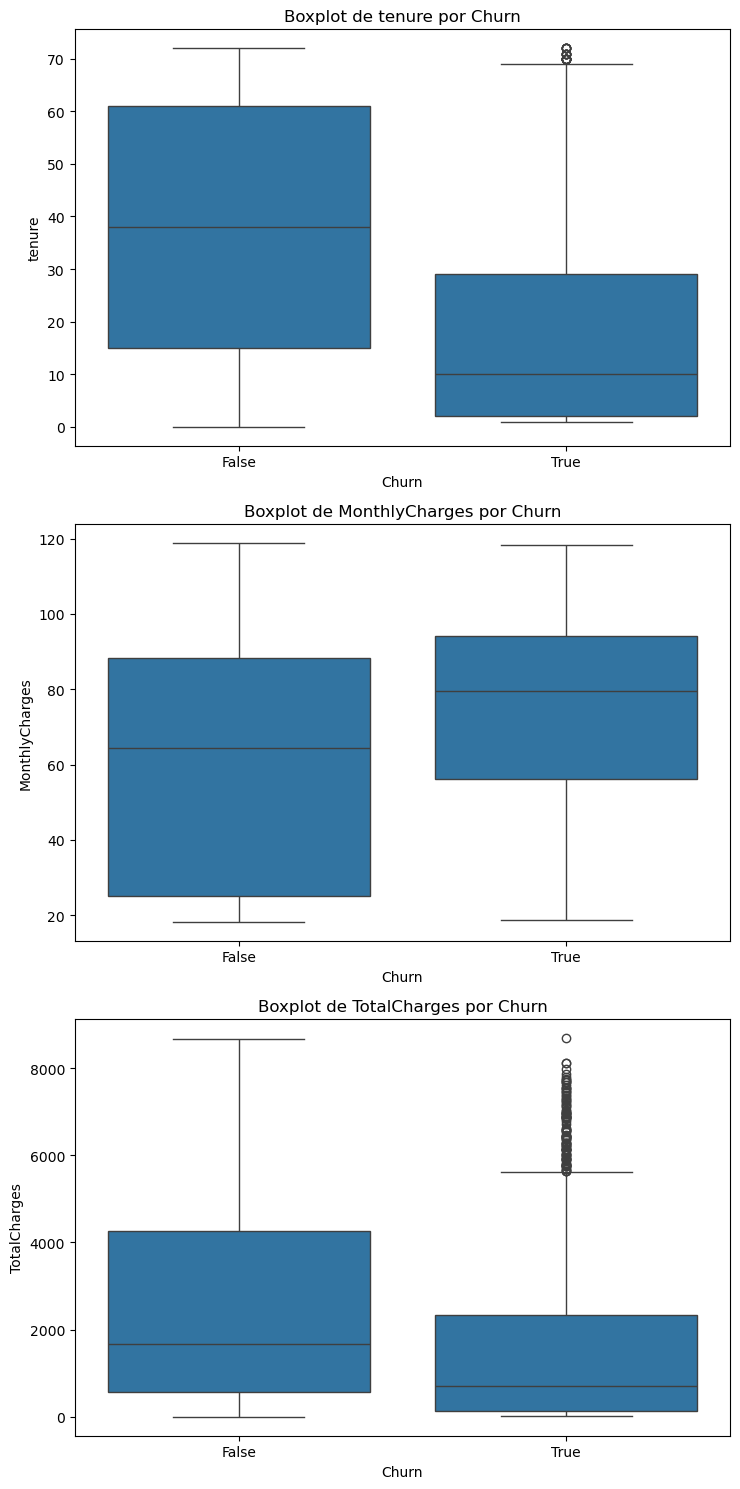

In [18]:
print(df.groupby(['Churn'])[numerical_columns].describe().T)
# Configuración del tamaño de la gráfica
plt.figure(figsize=(7.5, 5 * len(numerical_columns)))
# Crear un boxplot para cada columna numérica segmentada por 'Churn'
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x='Churn', y=column, data=df)
    plt.title(f'Boxplot de {column} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

#### Visualización 2: Variables categóricas con respecto a la fuga de clientes

**Hipótesis planteadas**



**Análisis descriptivo que lo sustenta**

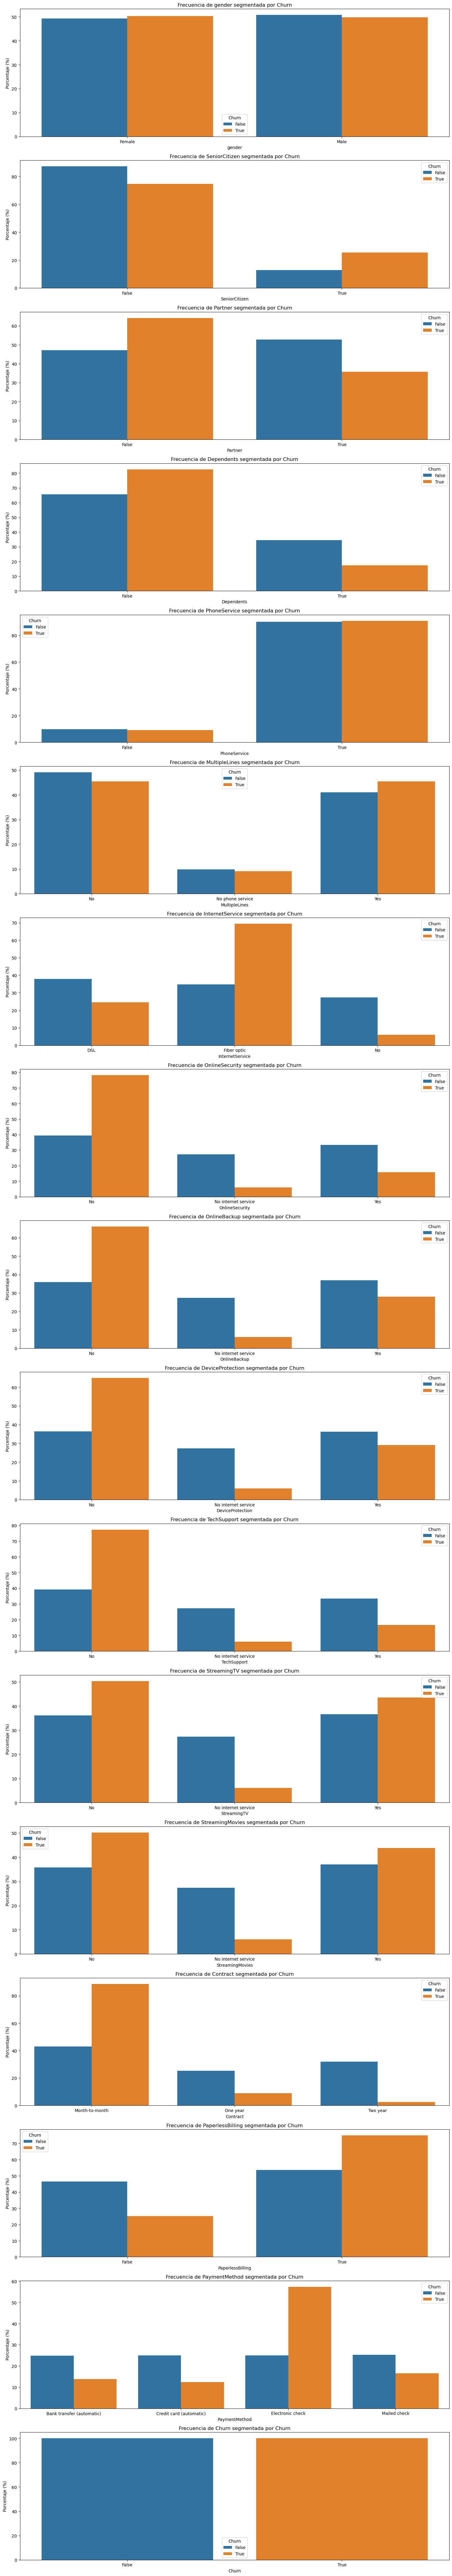

In [19]:
# Identificar columnas categóricas y booleanas
cat_bool_columns= df.select_dtypes(include=['category',bool]).columns
# Configurar el tamaño general del gráfico
plt.figure(figsize=(15, 5 * len(cat_bool_columns)))

# Crear gráficos de barras para cada variable categórica/booleana segmentada por 'Churn'
for i, col in enumerate(cat_bool_columns, 1):
    plt.subplot(len(cat_bool_columns), 1, i)
    # Calcular la frecuencia relativa en porcentaje
    churn_counts = df.groupby('Churn')[col].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    # Crear gráfico de barras
    sns.barplot(x=col, y='percentage', hue='Churn', data=churn_counts)
    plt.title(f'Frecuencia de {col} segmentada por Churn')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

##### Visualización 3: Correlaciones

**Análisis**

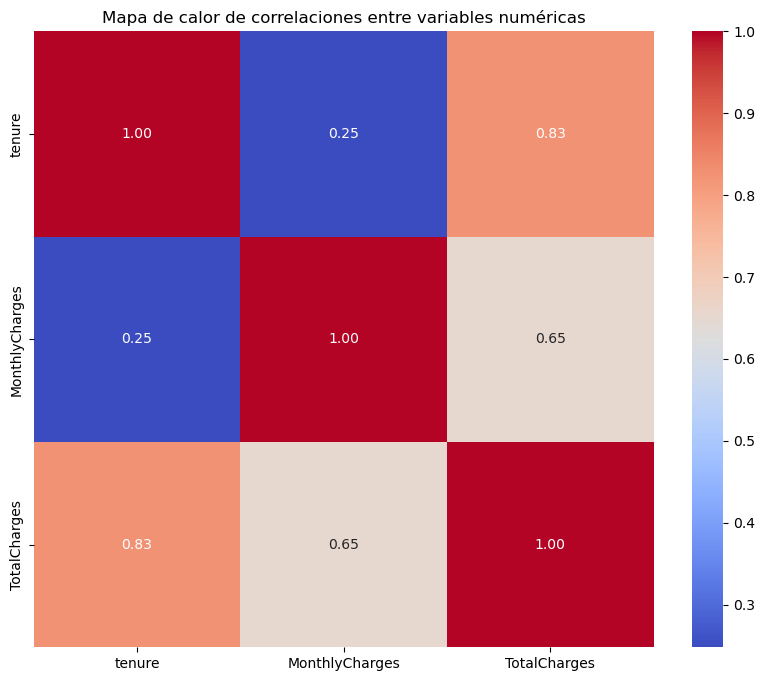

In [20]:
correlation_matrix = df[numerical_columns].corr()

# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

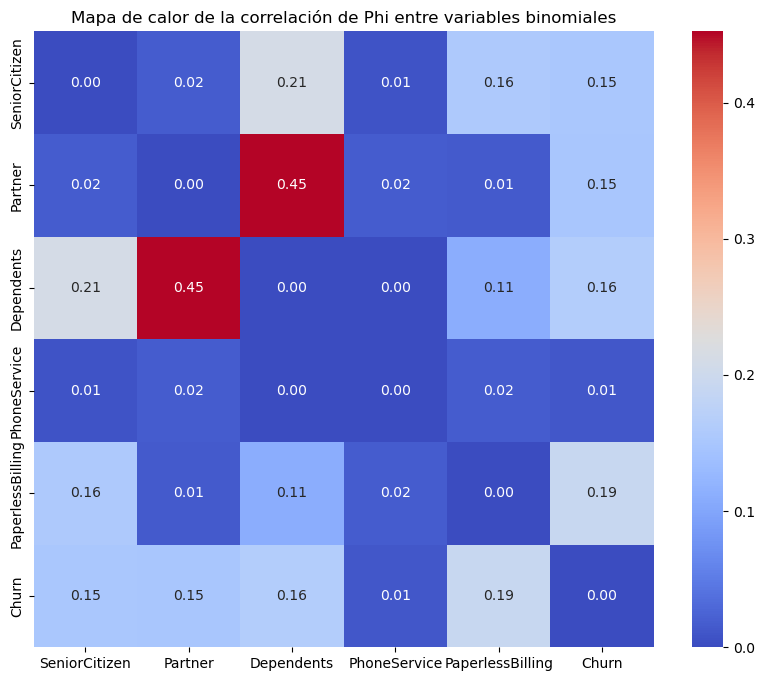

In [22]:
# Filtrar columnas binomiales (con valores 0 y 1)
binomial_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
# Inicializar la matriz de correlación de Phi
phi_corr_matrix = pd.DataFrame(np.zeros((len(binomial_columns), len(binomial_columns))), 
                               index=binomial_columns, columns=binomial_columns)
# Calcular la correlación de Phi para cada par de variables
for col1 in binomial_columns:
    for col2 in binomial_columns:
        if col1 != col2:
            # Crear una tabla de contingencia
            contingency_table = pd.crosstab(df[col1], df[col2])
            # Calcular el estadístico Chi-cuadrado y extraer el valor Phi
            chi2, _, _, _ = chi2_contingency(contingency_table)
            phi = np.sqrt(chi2 / df.shape[0])
            phi_corr_matrix.loc[col1, col2] = phi
# Graficar el mapa de calor de la matriz de correlación de Phi
plt.figure(figsize=(10, 8))
sns.heatmap(phi_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de calor de la correlación de Phi entre variables binomiales')
plt.show()

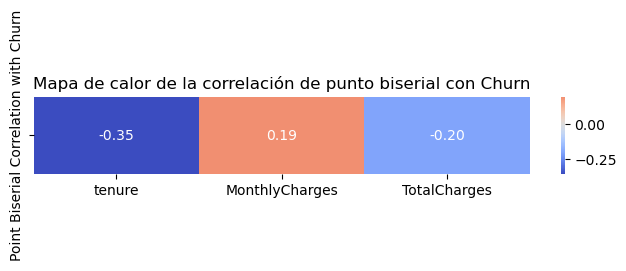

In [26]:
# Calcular la correlación de punto biserial entre Churn y las variables numéricas
churn_corr = {col: pointbiserialr(df['Churn'], df[col])[0] for col in numerical_columns}
# Convertir el diccionario a un DataFrame para facilitar la visualización
churn_corr_df = pd.DataFrame.from_dict(churn_corr, orient='index', columns=['Point Biserial Correlation with Churn'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(8, 1))
sns.heatmap(churn_corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con Churn')
plt.show()